In [1]:
#importing Libraries
import numpy as np
import pandas as pd

#importing Visuilasation libraries
import seaborn as sns
import matplotlib.pyplot as plt

#importing Libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing Data from Csv
df= pd.read_csv('messages.csv')

In [3]:
#looking at dataframe
df

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


The dataFrame is divided into 3 column,
**Subject** - The Subject of email.

**Messages** - Content of mail.

**Label** - as 0 = Not Spam, 1 = Spam



In [4]:
#information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


# Null Values

In [5]:
#Checking Null Values
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

we see subject has 62 null values

In [6]:
for i in df.columns:
    print(i)
    print(df[i].nunique())
    print('...........................................')

subject
2613
...........................................
message
2859
...........................................
label
2
...........................................


we see that in feature 1 and 2 

all the values are almost unique

and approx 2% of data so we will remove all the rows with NaN values

In [7]:
#dropping null values
df.dropna(inplace=True)

In [71]:
df

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [8]:
#making dataframe to lowercase
df.subject = df.subject.str.lower()
df.message = df.message.str.lower()

Now to do the filter and making a NLP Processing we will take one reference message and make model around that

# Cleaning

In [9]:
#refrence message
ref = df.message[0]

In [10]:
ref

"content - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical language modeling ; text tokenization and

we see lots of punctuation, numbers and characters, so we clean all and do tokenization by spiliting

In [11]:
import re

In [12]:
# removing punctuation
refClean = re.sub(r'[^\w\s] ', '', ref)


# replacing all the numbers with a string 'numbrs'
refClean = re.sub("\d+", 'numbr', refClean)

#removing hypens and dashes
refClean = list(filter(None,[word.strip('-|_') for word in refClean.split()]))

In [13]:
refClean

['content',
 'length',
 'numbr',
 'apple-iss',
 'research',
 'center',
 'a',
 'us',
 'numbr',
 'million',
 'joint',
 'venture',
 'between',
 'apple',
 'computer',
 'inc',
 'and',
 'the',
 'institute',
 'of',
 'systems',
 'science',
 'of',
 'the',
 'national',
 'university',
 'of',
 'singapore',
 'located',
 'in',
 'singapore',
 'is',
 'looking',
 'for',
 'a',
 'senior',
 'speech',
 'scientist',
 'the',
 'successful',
 'candidate',
 'will',
 'have',
 'research',
 'expertise',
 'in',
 'computational',
 'linguistics',
 'including',
 'natural',
 'language',
 'processing',
 'and',
 'english',
 'and',
 'chinese',
 'statistical',
 'language',
 'modeling',
 'knowledge',
 'of',
 'state-of',
 'the-art',
 'corpus-based',
 'n',
 'gram',
 'language',
 'models',
 'cache',
 'language',
 'models',
 'and',
 'part-of',
 'speech',
 'language',
 'models',
 'are',
 'required',
 'a',
 'text',
 'to',
 'speech',
 'project',
 'leader',
 'the',
 'successful',
 'candidate',
 'will',
 'have',
 'research',
 'exper

In [14]:
#making copy of data
ref1= refClean.copy()

Now we will rwmove all the stop words and words which are less then 3 character

In [15]:
#Stop Word Removal
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

refstop = ref1.copy()
for word in ref1:   
    if word in stop_words:
        refstop.remove(word)


#removing words with less 3 letters
for word in refstop:
    if len(word) < 4:
        refstop.remove(word)

In [16]:
def processedData(ref):
    stop_words = set(stopwords.words('english'))
    
    refClean = re.sub(r'[^\w\s] ', '', ref)  
    
    refClean = re.sub("\d+", 'numbr ', refClean)  
    
    refClean = list(filter(None,[word.strip('-|_') for word in refClean.split()]))
    
    ref1 = refClean
    refstop = ref1.copy()
    
    for word in ref1:
        if word in stop_words:
            refstop.remove(word)
                
            
    for word in refstop:
        if len(word) < 4:
            refstop.remove(word)
            
    return ' '.join(refstop)

In [17]:
msgg = df.message.apply(processedData)
test_df = pd.DataFrame(msgg)

In [18]:
test_df

,message
0,content length numbr apple-iss research center...
2,posting inquiry sergei atamas satamas umabnet ...
3,colleague researching differing degrees risk p...
4,earlier morning phone friend mine living south...
5,content length numbr call papers best good eno...
...,...
2888,hello thanks stopping taken many pics made new...
2889,list owner kiddin invited join mailing list li...
2890,judging return post must sounded like kind sel...
2891,gotcha separate fallacies argument n-ary compa...


In [19]:
# making columns of initial and final lenght after cleaning
test_df['lenbefore'] = df.message.apply(lambda x: len(x))
test_df['lenafter_cleaning'] = test_df.message.apply(lambda x: len(x))

In [20]:
test_df

,message,lenbefore,lenafter_cleaning
0,content length numbr apple-iss research center...,2856,1971
2,posting inquiry sergei atamas satamas umabnet ...,1435,1019
3,colleague researching differing degrees risk p...,324,208
4,earlier morning phone friend mine living south...,1046,576
5,content length numbr call papers best good eno...,4492,3188
...,...,...,...
2888,hello thanks stopping taken many pics made new...,262,120
2889,list owner kiddin invited join mailing list li...,2163,1166
2890,judging return post must sounded like kind sel...,1039,604
2891,gotcha separate fallacies argument n-ary compa...,2949,1793


# Stemming and lematization

In [21]:
#Importing Libraries

from nltk.stem import WordNetLemmatizer 
from nltk import tokenize
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer

In [22]:

def stemming_fuction(ref):
    stemmer = PorterStemmer()
    stemwords = []
    tkens = tokenize.word_tokenize(ref)
    for word in tkens:
        stemwords.append(stemmer.stem(word))

    return " ".join(stemwords)

In [23]:
test_df.message = test_df.message.apply(stemming_fuction)
test_df['lenafter__stemming'] = test_df.message.apply(lambda x: len(x))

In [24]:
def lemmatizer_function(ref):
    lemmatizer = WordNetLemmatizer() 
    lemwords = []
    tkens2 = tokenize.word_tokenize(ref)
    for word in tkens2: 
        lemwords.append(lemmatizer.lemmatize(word))

    return ' '.join(lemwords)

In [25]:
test_df.message = test_df.message.apply(lemmatizer_function)
test_df['lenafter__lemmatizer'] = test_df.message.apply(lambda x: len(x))

In [26]:
test_df

,message,lenbefore,lenafter_cleaning,lenafter__stemming,lenafter__lemmatizer
0,content length numbr apple-iss research center...,2856,1971,1616,1611
2,post inquiri sergei atama satama umabnet umd r...,1435,1019,912,910
3,colleagu research differ degre risk perceiv ho...,324,208,180,180
4,earlier morn phone friend mine live south amer...,1046,576,509,508
5,content length numbr call paper best good enou...,4492,3188,2733,2732
...,...,...,...,...,...
2888,hello thank stop taken mani pic made new video...,262,120,105,105
2889,list owner kiddin invit join mail list listbot...,2163,1166,1069,1069
2890,judg return post must sound like kind self-pro...,1039,604,513,513
2891,gotcha separ fallaci argument n-ari comparison...,2949,1793,1578,1571


# No Meaning Words

In [27]:
# removing words which makes no meaning in the english language
from nltk.corpus import words

In [28]:
def non_dictionarian_words_count(ref):
    meaningfull_words = [w.lower() for w in words.words()]
    meaningfull_words.append('numbr ')
    ref_list = ref.split()
    cleanedlist = ref_list.copy()
    for element in ref_list:
        if not(element in meaningfull_words or  wordnet.synsets(element)):
            cleanedlist.remove(element)
    return ' '.join(cleanedlist)

In [29]:
test_df.message = test_df.message.apply(non_dictionarian_words_count)

In [30]:
test_df['lenafter__removing_words_with_no_meaning'] = test_df.message.apply(lambda x: len(x))

In [31]:
test_df

,message,lenbefore,lenafter_cleaning,lenafter__stemming,lenafter__lemmatizer,lenafter__removing_words_with_no_meaning
0,content length research center million joint s...,2856,1971,1616,1611,751
2,post sergei research maryland field molecular ...,1435,1019,912,910,503
3,research differ risk hong student differ conte...,324,208,180,180,118
4,earlier morn phone friend mine live south amer...,1046,576,509,508,320
5,content length call paper best good enough wor...,4492,3188,2733,2732,1449
...,...,...,...,...,...,...
2888,hello thank stop taken mani pic made new video...,262,120,105,105,90
2889,list owner join mail list must join list blank...,2163,1166,1069,1069,553
2890,return post must sound like kind expert compos...,1039,604,513,513,274
2891,argument comparison discus recent power seek d...,2949,1793,1578,1571,846


# Visulasation

<AxesSubplot:xlabel='label', ylabel='count'>

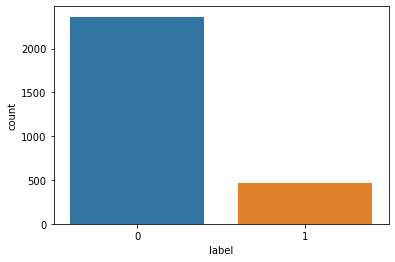

In [32]:
# plotting the class balance 
sns.countplot(df.label)

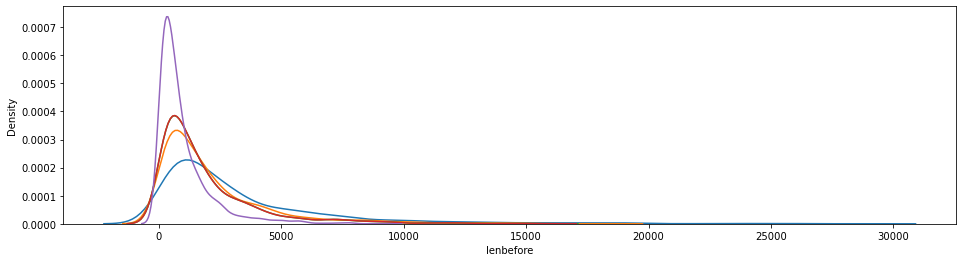

In [33]:
plt.figure(figsize=(16,4))
for col in test_df.columns[1:]:
    sns.kdeplot(test_df[col])

In [34]:
test_df['label'] = df.label

In [35]:
test_df

,message,lenbefore,lenafter_cleaning,lenafter__stemming,lenafter__lemmatizer,lenafter__removing_words_with_no_meaning,label
0,content length research center million joint s...,2856,1971,1616,1611,751,0
2,post sergei research maryland field molecular ...,1435,1019,912,910,503,0
3,research differ risk hong student differ conte...,324,208,180,180,118,0
4,earlier morn phone friend mine live south amer...,1046,576,509,508,320,0
5,content length call paper best good enough wor...,4492,3188,2733,2732,1449,0
...,...,...,...,...,...,...,...
2888,hello thank stop taken mani pic made new video...,262,120,105,105,90,1
2889,list owner join mail list must join list blank...,2163,1166,1069,1069,553,1
2890,return post must sound like kind expert compos...,1039,604,513,513,274,0
2891,argument comparison discus recent power seek d...,2949,1793,1578,1571,846,0


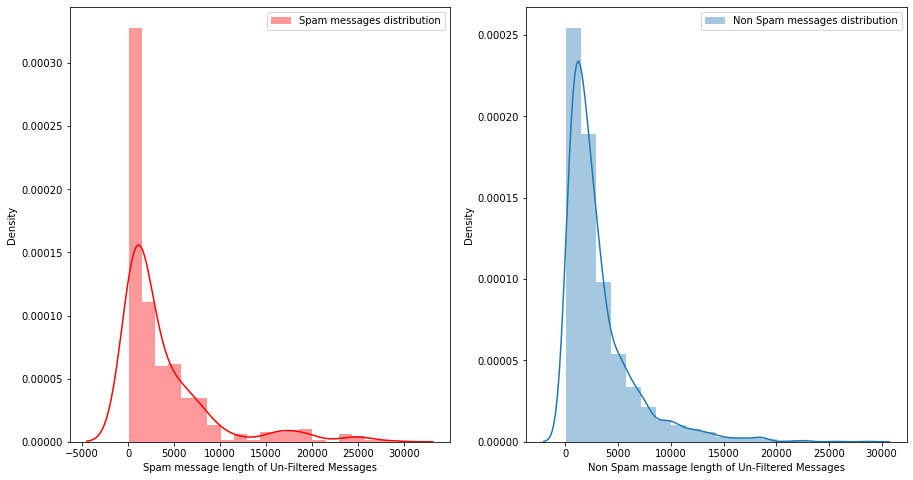

In [36]:
#Plotting Distrubtion of length of message before filterting
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(test_df[test_df['label']==1]['lenbefore'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam message length of Un-Filtered Messages')
ax[0].legend()

sns.distplot(test_df[test_df['label']==0]['lenbefore'],bins=20,ax=ax[1],label='Non Spam messages distribution')
ax[1].set_xlabel('Non Spam massage length of Un-Filtered Messages')
ax[1].legend()

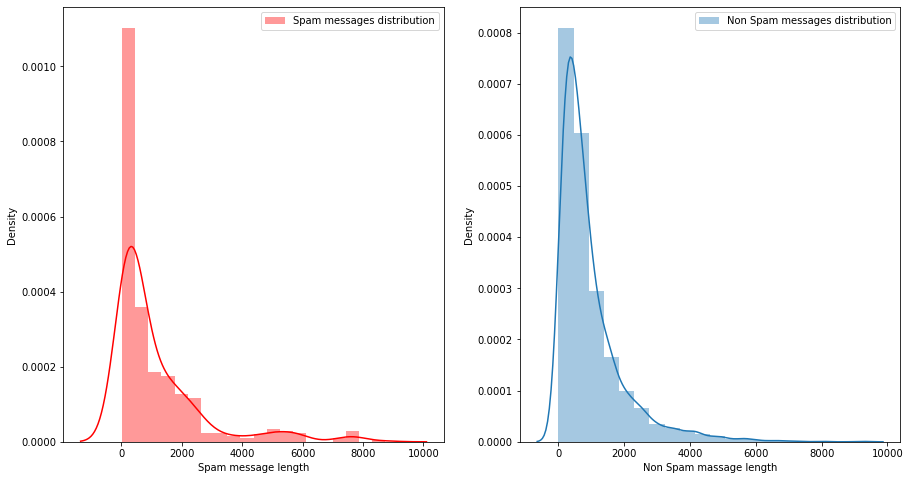

In [37]:
#Plotting Distrubtion of length of message after filterting
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(test_df[test_df['label']==1]['lenafter__removing_words_with_no_meaning'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(test_df[test_df['label']==0]['lenafter__removing_words_with_no_meaning'],bins=20,ax=ax[1],label='Non Spam messages distribution')
ax[1].set_xlabel('Non Spam massage length')
ax[1].legend()

# Creating word dictionary

In [38]:
from sklearn.feature_extraction.text import CountVectorizer 

In [39]:
def word_dict(col, countvect):
    terms_doc = countvect.fit_transform(col)
    word_list = countvect.get_feature_names();    
    count_list = terms_doc.toarray().sum(axis=0)    
    return dict(zip(word_list,count_list))

In [40]:
message_vocab  = word_dict(test_df.message,CountVectorizer())

In [41]:
message_vocab

{'aa': 5,
 'aaa': 25,
 'aachen': 11,
 'aal': 2,
 'aalborg': 7,
 'aaron': 15,
 'ab': 6,
 'aback': 1,
 'abandon': 15,
 'abb': 1,
 'abba': 6,
 'abc': 2,
 'abdomen': 1,
 'abduct': 14,
 'abe': 2,
 'abel': 5,
 'aberdeen': 9,
 'abigail': 2,
 'ablaut': 4,
 'abler': 1,
 'aboard': 3,
 'abolish': 1,
 'abord': 2,
 'abound': 4,
 'about': 1,
 'abox': 1,
 'abraham': 13,
 'abram': 1,
 'abreast': 1,
 'abroad': 24,
 'abrook': 1,
 'absalom': 1,
 'abscissa': 1,
 'absent': 12,
 'absolutist': 1,
 'absorb': 4,
 'absorpt': 3,
 'abstract': 1713,
 'absurd': 5,
 'abu': 2,
 'abyss': 1,
 'ac': 312,
 'acacia': 3,
 'academia': 33,
 'academician': 4,
 'acc': 3,
 'accent': 126,
 'accept': 1017,
 'access': 458,
 'accident': 11,
 'acclaim': 6,
 'accomplish': 32,
 'accord': 161,
 'account': 561,
 'accra': 1,
 'accredit': 6,
 'accustom': 2,
 'acer': 2,
 'ach': 4,
 'acid': 6,
 'acquaint': 18,
 'acquist': 2,
 'acrobat': 5,
 'acronym': 6,
 'across': 181,
 'act': 66,
 'acta': 5,
 'action': 186,
 'activist': 7,
 'acton': 6,
 '

# Word Cloud

In [42]:
from wordcloud import WordCloud

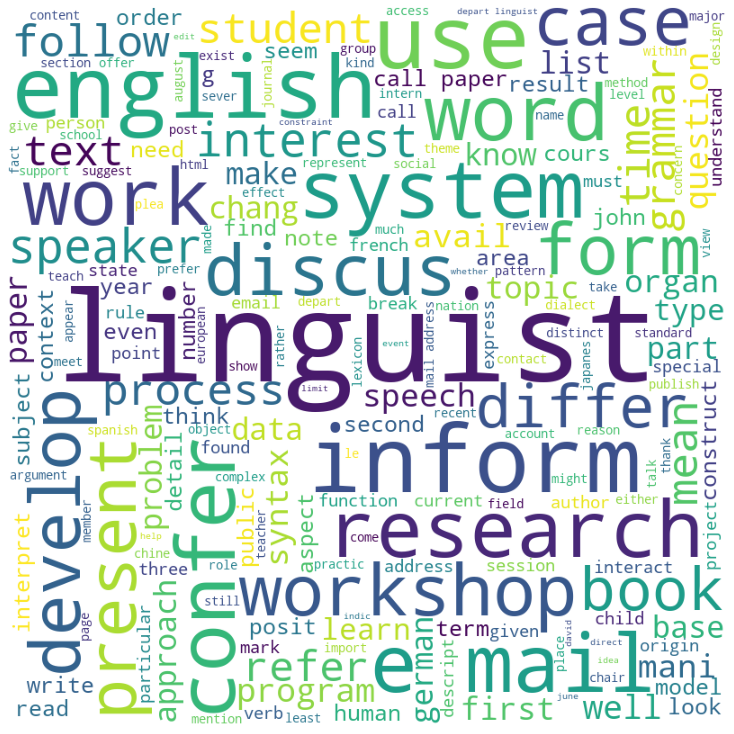

In [43]:
spams = test_df[test_df.label == 0]['message']

wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    min_font_size = 10).generate(' '.join(spams))

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0) 

plt.show()

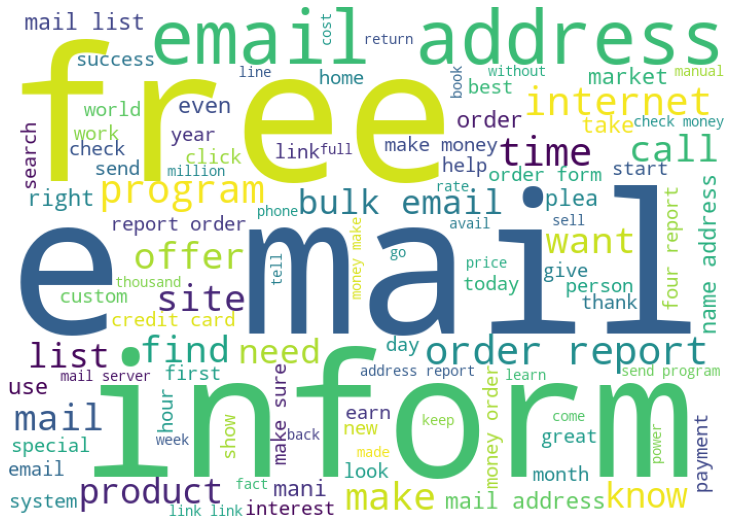

In [44]:
spams = test_df['message'][test_df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(spams))

plt.figure(figsize=(10,10),facecolor='white')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Processing DataFrame

In [45]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report,plot_confusion_matrix,plot_roc_curve

In [46]:
df_raw = pd.read_csv('messages.csv')

In [47]:
df_raw.dropna(inplace=True)

In [48]:
def vectorizer(df):
        vectorizer_m = TfidfVectorizer()
        vectorizer_s = TfidfVectorizer()

        message_sparse = vectorizer_m.fit_transform(df.message).todense()
        subject_sparse = vectorizer_s.fit_transform(df.subject).todense()

        df_vectred = pd.DataFrame(np.hstack([subject_sparse,message_sparse]),columns=['sub_'+element for element in vectorizer_s.get_feature_names()] + ['msg_'+element for element in vectorizer_m.get_feature_names()])

        #df_vectred['label'] = df.reset_index().label
        return df_vectred

In [49]:
def text_processor(df):
    df_copy = df.copy()
        
    df_copy.subject = df.subject.apply(processedData)
    df_copy.subject = df_copy.subject.apply(stemming_fuction)
    df_copy.subject = df_copy.subject.apply(lemmatizer_function)
    df_copy.subject = df_copy.subject.apply(non_dictionarian_words_count)

        
        
    df_copy.message = df.message.apply(processedData)
    df_copy.message = df_copy.message.apply(stemming_fuction)
    df_copy.message = df_copy.message.apply(lemmatizer_function)
    df_copy.message = df_copy.message.apply(non_dictionarian_words_count)
    
    return vectorizer(df_copy)

In [50]:
final_data = text_processor(df_raw)

In [60]:
df_raw

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


# Train test split

In [64]:
x = final_data
y = df_raw['label']

In [74]:
#seprating database into train test slpit
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=0.20)

In [76]:
#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,f1_score

In [77]:
#testing Different Models
model=[DecisionTreeClassifier(), GaussianNB(), LogisticRegression(), KNeighborsClassifier()]
for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i)
    #Printing Model Score
    print('Model Score =', i.score(x_train,y_train))
    print('\n')
    
    #Printing Accuracy Score
    acc = accuracy_score(y_test,pred)
    print('Accuracy Score =', acc )
    print('\n')
    
    #Printing Confusion Matrix
    print('Counfusion Matix')
    print(confusion_matrix(y_test,pred))
    print('\n')
    
    #Printing Classification Report
    print('Classification Report')
    print(classification_report(y_test,pred))
    print('\n')
    
    #Printing AUC ROC Score
    roc_auc = roc_auc_score(y_test,pred)
    print('Auc Roc Score =', roc_auc )
    print('\n')
    
    #Printing Cross Validation Score
    cross = cross_val_score(i,x,y,cv=5).mean()
    print('Cross Val Score =', cross )
    print('\n')
    print('_______________________________________________________________________________________________________________')

DecisionTreeClassifier()
Model Score = 1.0


Accuracy Score = 0.9594356261022927


Counfusion Matix
[[461   9]
 [ 14  83]]


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       470
           1       0.90      0.86      0.88        97

    accuracy                           0.96       567
   macro avg       0.94      0.92      0.93       567
weighted avg       0.96      0.96      0.96       567



Auc Roc Score = 0.9182605834612855


Cross Val Score = 0.946661182468014


_______________________________________________________________________________________________________________
GaussianNB()
Model Score = 0.9951413427561837


Accuracy Score = 0.9453262786596119


Counfusion Matix
[[460  10]
 [ 21  76]]


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       470
           1       0.88      0.78      0.83        97

    accuracy           

# Ensembel Technique

In [78]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier , GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier

In [79]:
#testing Different Models
model=[RandomForestClassifier(), AdaBoostClassifier() , GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier() ]

for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i)
    #Printing Model Score
    print('Model Score =', i.score(x_train,y_train))
    print('\n')
    
    #Printing Accuracy Score
    acc = accuracy_score(y_test,pred)
    print('Accuracy Score = ', acc )
    print('\n')
    
    #Printing Confusion Matrix
    print('Counfusion Matix')
    print(confusion_matrix(y_test,pred))
    print('\n')
    
    #Printing Classification Report
    print('Classification Report')
    print(classification_report(y_test,pred))
    print('\n')
    
    #Printing AUC ROC Score
    roc_auc = roc_auc_score(y_test,pred)
    print('Auc Roc Score =', roc_auc )
    print('\n')
    
    #Printing Cross Validation Score
    cross = cross_val_score(i,x,y,cv=5).mean()
    print('Cross Val Score =' , cross )
    print('\n')
    print('..................................................................................................................')
    


RandomForestClassifier()
Model Score = 1.0


Accuracy Score =  0.9700176366843033


Counfusion Matix
[[470   0]
 [ 17  80]]


Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       470
           1       1.00      0.82      0.90        97

    accuracy                           0.97       567
   macro avg       0.98      0.91      0.94       567
weighted avg       0.97      0.97      0.97       567



Auc Roc Score = 0.9123711340206185


Cross Val Score = 0.9720947769239878


..................................................................................................................
AdaBoostClassifier()
Model Score = 0.997791519434629


Accuracy Score =  0.9611992945326279


Counfusion Matix
[[459  11]
 [ 11  86]]


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       470
           1       0.89      0.89      0.89        97

    accura

we see that extra tree classifier has best accuracy score, f1 score, auc_roc score ann cross val score

so we will process with **AdaBoost Classifier**

# Hyper Parameter Tuning

In [84]:
#Grid Search 
para= { 'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5, 1]}

gd=GridSearchCV( estimator=AdaBoostClassifier() ,param_grid=para ,cv=5)
gd.fit(x,y)
best_para= gd.best_params_
print(best_para)

{'learning_rate': 1}


# Final Model

In [85]:
#calling Model
ec =AdaBoostClassifier(n_estimators=100, learning_rate= 1, random_state = 42 )


#fitting Train data in model
ec.fit(x_train,y_train)

#Predecting Values
pred=ec.predict(x_test)

#printing Matrics

#Printing Model Score
print('Model Score =', i.score(x_train,y_train))

#Printing Accuracy Score
print('Accuracy Score = ', accuracy_score(y_test,pred) )

#Printing AUC ROC Score
print('Auc Roc Score =', roc_auc_score(y_test,pred)
 )
    
#Printing Confusion Matrix
print('Counfusion Matix')
print(confusion_matrix(y_test,pred))
    
#Printing Classification Report
print('Classification Report')
print(classification_report(y_test,pred))

Model Score = 1.0
Accuracy Score =  0.9717813051146384
Auc Roc Score = 0.9502522483000657
Counfusion Matix
[[462   8]
 [  8  89]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       470
           1       0.92      0.92      0.92        97

    accuracy                           0.97       567
   macro avg       0.95      0.95      0.95       567
weighted avg       0.97      0.97      0.97       567



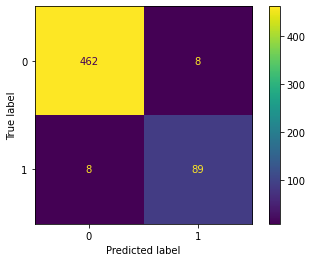

In [90]:
plot_confusion_matrix(ec,x_test,y_test)

In [86]:
#Cross Valadation
from sklearn.model_selection import cross_val_score
cross_val_score(ec,x,y,cv=5).mean()

0.983399704601118

Text(0.5, 1.0, 'ROC curve')

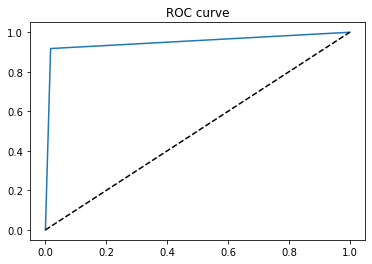

In [87]:
from sklearn.metrics import roc_curve
y_pred_prob=ec.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.title('ROC curve')

This is our final model with

Accuracy = 97%

F1-Score = 97%

Auc Roc Score = 95%

Cross Val Score = 98%

and sharp AUC_ROC_Curve

# Saving the model

In [91]:
#Saving best Model
import joblib
joblib.dump(ec,"spam.pkl")

['spam.pkl']